In [1]:
from pathlib import Path
root = Path("c:/deldir/perfect_physics")

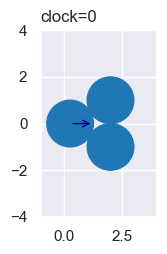

In [2]:
from sympy import sqrt, Rational
from perfect_physics import Circle, World

cue = Circle(x=2 - sqrt(3), y=0, r=1, vx=1, vy=0, m=1)
c0 = Circle(x=2, y=1, r=1, vx=0, vy=0, m=1)
c1 = Circle(x=2, y=-1, r=1, vx=0, vy=0, m=1)
world = World(circle_list=[cue, c0, c1],xlim=(-1,4), ylim=(-4,4))
world.show()
# world.run_in_place(1,show=True)
# print(cue.x)

pass

Multiple collisions: 2
c:\Users\carlk\OneDrive\Projects\Science\perfect-physics\perfect_physics\_misc.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()



sqrt(3)/3

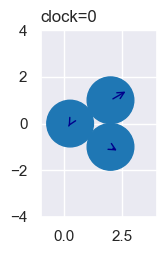

In [30]:
from copy import deepcopy
import numpy as np
world_z = deepcopy(world)
world_z.run_in_place(1,show=False)
world_z.show()
world_z.circle_list[1].vy/world_z.circle_list[1].vx



In [37]:
import math
math.atan2(world_z.circle_list[1].vy,world_z.circle_list[1].vx)/(2*math.pi)*360,world_z.circle_list[1].vy,world_z.circle_list[1].vx


(30.0, sqrt(3)/4, 3/4)

In [9]:
from sympy import symbols, Eq ,S
a_vx = symbols("a_vx")
ahat_vx, bhat_vx, chat_vx = symbols("ahat_vx, bhat_vx, chat_vx")
ahat_vy, bhat_vy, chat_vy = symbols("ahat_vy, bhat_vy, chat_vy")

energy_before = cue.m * cue.vx**2 / S(2)
energy_after = cue.m * (ahat_vx**2+ahat_vy**2) / 2 +c0.m * (bhat_vx**2+bhat_vy**2) / 2 + c1.m * (chat_vx**2+chat_vy**2) / 2
eq1 = Eq(energy_before, energy_after)
eq1

Eq(1/2, ahat_vx**2/2 + ahat_vy**2/2 + bhat_vx**2/2 + bhat_vy**2/2 + chat_vx**2/2 + chat_vy**2/2)

In [13]:
eq2 = Eq(cue.m * cue.vx + c0.m * c0.vx + c1.m * c1.vx, cue.m * ahat_vx + c0.m * bhat_vx + c1.m * chat_vx)
eq2

Eq(1, ahat_vx + bhat_vx + chat_vx)

In [14]:
eq3 = Eq(cue.m * cue.vy + c0.m * c0.vy + c1.m * c1.vy, cue.m * ahat_vy + c0.m * bhat_vy + c1.m * chat_vy)
eq3

Eq(0, ahat_vy + bhat_vy + chat_vy)

In [18]:
eq4 = Eq(ahat_vy,0)
eq5 = Eq(bhat_vy,-chat_vy)
eq6 = Eq(bhat_vx,chat_vx)
eq7 = Eq # angle of collision

Eq(bhat_vx, chat_vx)

In [19]:
from sympy import nonlinsolve
sym_bern_velocity_solutions = nonlinsolve([eq1, eq2, eq3, eq4, eq5, eq6], [ahat_vx, ahat_vy, bhat_vx, bhat_vy, chat_vx, chat_vy])
sym_bern_velocity_solutions

{(1/3 - 2*sqrt(1 - 3*chat_vy**2)/3, 0, sqrt(1 - 3*chat_vy**2)/3 + 1/3, -chat_vy, sqrt(1 - 3*chat_vy**2)/3 + 1/3, chat_vy), (2*sqrt(1 - 3*chat_vy**2)/3 + 1/3, 0, 1/3 - sqrt(1 - 3*chat_vy**2)/3, -chat_vy, 1/3 - sqrt(1 - 3*chat_vy**2)/3, chat_vy)}

In [23]:
sym_bern_velocity_solutions.subs({"chat_vy":S(1)/4})

{(1/3 - sqrt(13)/6, 0, sqrt(13)/12 + 1/3, -1/4, sqrt(13)/12 + 1/3, 1/4), (1/3 + sqrt(13)/6, 0, 1/3 - sqrt(13)/12, -1/4, 1/3 - sqrt(13)/12, 1/4)}